In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

In [2]:
data = pd.read_csv('DSL-StrongPasswordData1.csv', header = 0)
data = data.reset_index()
unisub = list(data['subject'].unique())
mlist = [int(x) for x in range(len(unisub))]
newvalue = dict(zip(unisub, mlist))
data['subject'] = data['subject'].map(newvalue)

In [3]:
print(data)

      index  subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t  \
0         0        0             1    1    0.1491       0.3979       0.2488   
1         1        0             1    2    0.1111       0.3451       0.2340   
2         2        0             1    3    0.1328       0.2072       0.0744   
3         3        0             1    4    0.1291       0.2515       0.1224   
4         4        0             1    5    0.1249       0.2317       0.1068   
...     ...      ...           ...  ...       ...          ...          ...   
3995   3995        9             8   46    0.1027       0.1169       0.0142   
3996   3996        9             8   47    0.0971       0.0904      -0.0067   
3997   3997        9             8   48    0.0781       0.0926       0.0145   
3998   3998        9             8   49    0.0776       0.1097       0.0321   
3999   3999        9             8   50    0.0861       0.0846      -0.0015   

         H.t  DD.t.i  UD.t.i  ...     H.a  DD.a.n  

In [4]:
train, test = train_test_split(data, test_size = 0.2, random_state=42)

features = list(data.columns[2:])

X = train[features]
y = train['subject']

X_test = test[features]
y_test = test['subject']

In [5]:
scaler = StandardScaler()
scaler.fit(X)

scaler.transform(X)
scaler.transform(X_test)

array([[-0.21470819, -1.35359852,  1.91760949, ..., -0.27297727,
        -0.32427978, -0.13553928],
       [ 0.66389309,  1.12935663,  0.49741936, ..., -0.01155124,
        -0.25439112,  1.43392208],
       [-0.65400883,  0.16376296,  1.47788535, ..., -0.43066281,
        -0.20916905, -0.23993005],
       ...,
       [ 1.10319374,  1.26729858, -0.72073535, ..., -0.63150439,
        -0.42130169,  0.13083719],
       [-1.53261011,  1.19832761, -0.48304662, ..., -0.46468969,
        -0.33661308,  0.50160444],
       [-1.09330947,  0.57758882, -0.20079126, ...,  0.08223016,
         0.16000752, -0.38031765]])

In [41]:
net = MLPClassifier(random_state=42,hidden_layer_sizes=(42, 2),max_iter=600,activation= 'relu', learning_rate= 'invscaling', solver='adam')

In [42]:
net.fit(X,y)

C:\Users\vishwajeet\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(42, 2), learning_rate='invscaling',
              max_iter=600, random_state=42)

In [43]:
pred=net.predict(X_test)

In [44]:
predicted_output = net.predict_proba(X_test)

In [45]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy:',model_accuracy)

Accuracy: 0.705


In [32]:
metrics.roc_auc_score(y_test,predicted_output,multi_class='ovo')

0.9885971045639546

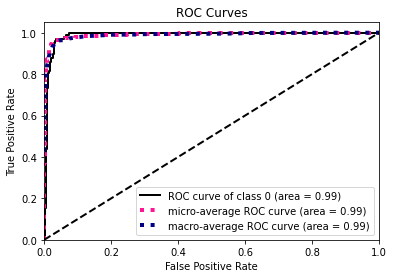

In [33]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(y_test,predicted_output,figsize=None,classes_to_plot=[0])

plt.show()

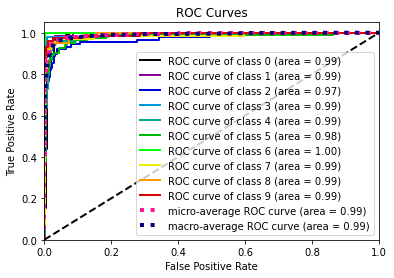

In [34]:
skplt.metrics.plot_roc(y_test,predicted_output,figsize=None)

plt.show()

In [35]:
print(classification_report(y_test, pred, target_names=unisub))


              precision    recall  f1-score   support

        s002       0.83      0.88      0.86        98
        s003       0.83      0.88      0.85        73
        s004       0.83      0.80      0.81        88
        s005       0.98      0.92      0.95        89
        s007       0.83      0.92      0.87        74
        s008       0.87      0.83      0.85        82
        s010       0.99      0.95      0.97        78
        s011       0.87      0.92      0.89        64
        s012       0.97      0.88      0.92        81
        s013       0.89      0.93      0.91        73

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

